Sample data:
        date  search_ad_spend  display_ad_spend  youtube_ad_spend      outcome
0 2024-01-01       239.367939        152.731505        351.238281  1476.171881
1 2024-01-02       149.446473         75.874165        245.652688  1150.430876
2 2024-01-03       138.228358         50.882708        151.920694  1245.594908
3 2024-01-04       138.230229         50.483209        285.815219  1332.972996
4 2024-01-05       464.971441        181.627736        278.135317  1522.307342

--- Summary Statistics ---
                                date  search_ad_spend  display_ad_spend  \
count                            365       365.000000        365.000000   
mean   2024-07-01 00:00:00.000000256       198.435312        315.238887   
min              2024-01-01 00:00:00        13.166968          3.732906   
25%              2024-04-01 00:00:00        96.484462        133.214662   
50%              2024-07-01 00:00:00       169.055795        260.695348   
75%              2024-09-30 00:00:0

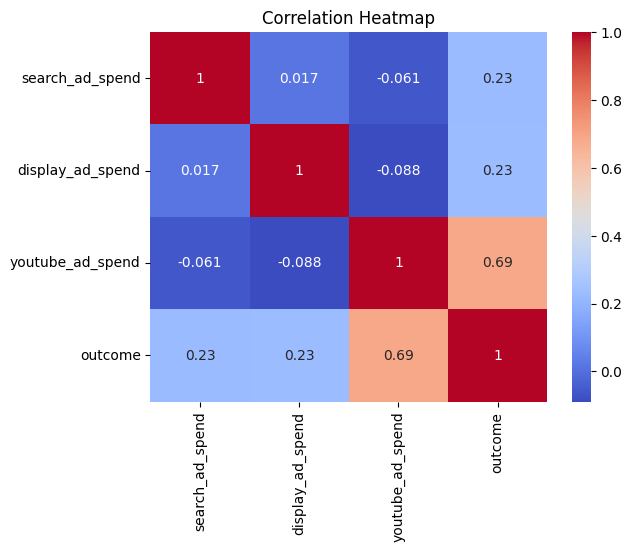


--- Model Coefficients ---
Intercept: 1050.6579049169713
search_ad_spend coeff: 0.44120674527016135
display_ad_spend coeff: 0.26109875302490654
youtube_ad_spend coeff: 0.7995025775247353

Test RMSE: 154.16
Test R^2: 0.44

--- Incremental Impact (Coefficient Interpretation) ---
Search:  0.441 additional outcomes per $1 spent.
Display: 0.261 additional outcomes per $1 spent.
YouTube: 0.800 additional outcomes per $1 spent.

--- Budget Optimization Results ---
Optimized spend allocation (Search, Display, YouTube): [    0.             0.         10000.00000003]
Predicted outcome at optimized allocation: 9045.68


<ipython-input-2-d37239063d96>:206: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test['predicted_outcome'] = y_pred


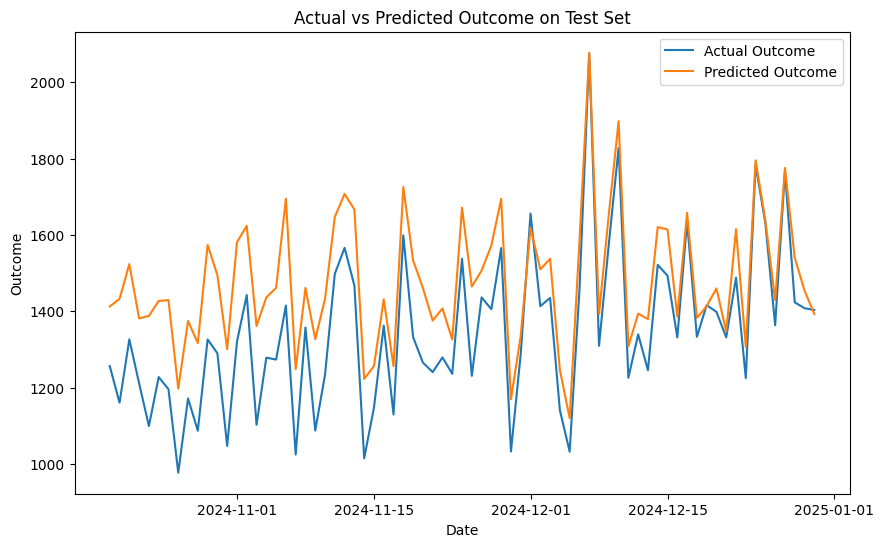

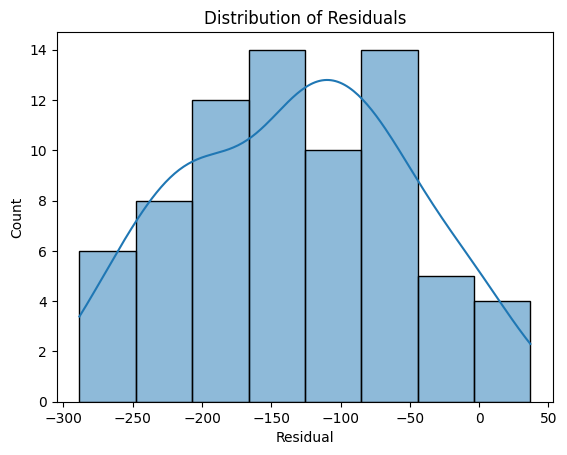


[Project Complete] - Demonstrated data generation, EDA, model building, incremental impact analysis, optimization, and basic reporting.


In [2]:
# ===========================
#  1. IMPORT DEPENDENCIES
# ===========================
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# For marketing optimization
from scipy.optimize import minimize

# Set a random seed for reproducibility
np.random.seed(42)

# ===========================
#  2. DATA GENERATION
# ===========================
# Let's simulate 365 days of data.
days = 365

# Create a date range
dates = pd.date_range(start="2024-01-01", periods=days, freq='D')

# Marketing channels: Suppose we have three main channels
# - search_ad_spend
# - display_ad_spend
# - youtube_ad_spend

# We pick a random gamma distribution
search_ad_spend = np.random.gamma(shape=2.0, scale=100.0, size=days)
display_ad_spend = np.random.gamma(shape=1.5, scale=200.0, size=days)
youtube_ad_spend = np.random.gamma(shape=2.2, scale=150.0, size=days)

# Baseline outcome:
# We'll assume a base daily outcome with some seasonality
daily_base_outcome = 1000 + 200 * np.sin(2 * np.pi * np.arange(days) / 365)

# Now let's create a true function that we will use to simulate the outcome:
# We know that outcome = baseline + alpha1*search_spend + alpha2*display_spend + alpha3*youtube_spend + noise
# We will pick alpha1, alpha2, alpha3 to reflect different channel strengths
alpha_search = 0.5
alpha_display = 0.3
alpha_youtube = 0.8

# Add some random noise
noise = np.random.normal(0, 50, days)  # mean=0, std=50

# Now, create the outcome array
outcome = (daily_base_outcome
           + alpha_search * search_ad_spend
           + alpha_display * display_ad_spend
           + alpha_youtube * youtube_ad_spend
           + noise)

# Build a Pandas DataFrame
df = pd.DataFrame({
    'date': dates,
    'search_ad_spend': search_ad_spend,
    'display_ad_spend': display_ad_spend,
    'youtube_ad_spend': youtube_ad_spend,
    'outcome': outcome
})

# Display the first few rows
print("Sample data:")
print(df.head())

# ===========================
#  3. EXPLORATORY ANALYSIS
# ===========================
# Let's do some quick EDA: correlation, distributions, etc.

print("\n--- Summary Statistics ---")
print(df.describe())

# Correlation matrix
corr_matrix = df[['search_ad_spend', 'display_ad_spend', 'youtube_ad_spend', 'outcome']].corr()
print("\n--- Correlation Matrix ---")
print(corr_matrix)

# We can also visualize correlation
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

# ===========================
#  4. DATA SPLIT & MODELING
# ===========================
# We'll do a train-test split
X = df[['search_ad_spend', 'display_ad_spend', 'youtube_ad_spend']]
y = df['outcome']

# Print learned coefficients
print("\n--- Model Coefficients ---")
print(f"Intercept: {model.intercept_}")
print(f"search_ad_spend coeff: {model.coef_[0]}")
print(f"display_ad_spend coeff: {model.coef_[1]}")
print(f"youtube_ad_spend coeff: {model.coef_[2]}")

# Evaluate on test set
y_pred = model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
print(f"\nTest RMSE: {rmse:.2f}")
print(f"Test R^2: {r2:.2f}")

# ===========================
#  5. INCREMENTAL IMPACT ANALYSIS
# ===========================
# As a simple incremental impact measure:
# We can see how each channel's coefficient translates into incremental
# outcome per unit dollar of spend. For example, for youtube_ad_spend,
# a coefficient of ~0.8 means that for each additional $1 spent,
# we get 0.8 incremental outcome units.

# Additionally, we can measure partial dependence or just interpret coefficients directly
inc_search = model.coef_[0]
inc_display = model.coef_[1]
inc_youtube = model.coef_[2]

print("\n--- Incremental Impact (Coefficient Interpretation) ---")
print(f"Search:  {inc_search:.3f} additional outcomes per $1 spent.")
print(f"Display: {inc_display:.3f} additional outcomes per $1 spent.")
print(f"YouTube: {inc_youtube:.3f} additional outcomes per $1 spent.")

# ===========================
#  6. MARKETING BUDGET OPTIMIZATION
# ===========================
# Let's suppose we have a fixed total daily budget B.
# We want to decide how to allocate that budget among
# (search, display, youtube) to maximize predicted outcome.
#
# We'll use our linear model to define:
# predicted_outcome = intercept + c_search * search_spend
#                                 + c_display * display_spend
#                                 + c_youtube * youtube_spend
# subject to search_spend + display_spend + youtube_spend = B
# and search_spend, display_spend, youtube_spend >= 0
#
# We'll solve this using SciPy's `minimize`, but note we want
# to MAXIMIZE the predicted outcome, so we minimize the negative
# of the function.

def objective(spend_allocation, intercept, coefs, total_budget):
    # spend_allocation = [search_spend, display_spend, youtube_spend]
    # We want search_spend + display_spend + youtube_spend = total_budget
    # We'll incorporate constraints separately, or just penalize if it deviates.

    search_spend, display_spend, youtube_spend = spend_allocation
    # Negative predicted outcome for minimization
    pred = intercept + coefs[0]*search_spend + coefs[1]*display_spend + coefs[2]*youtube_spend
    return -pred

def constraint(spend_allocation, total_budget):
    # We want sum of spend_allocation == total_budget
    return sum(spend_allocation) - total_budget

B = 10000  # Suppose we have $10,000 daily budget

# Initial guess
x0 = np.array([B/3, B/3, B/3])  # even split

# Constraints in SciPy format
cons = ({
    'type': 'eq',
    'fun': lambda x: constraint(x, B)
})

# Bounds for each spend variable: (0, None) meaning >= 0
bnds = ((0, None), (0, None), (0, None))

res = minimize(
    fun=objective,
    x0=x0,
    args=(model.intercept_, model.coef_, B),
    method='SLSQP',
    constraints=cons,
    bounds=bnds
)

optimized_spend = res.x
predicted_outcome_optimized = -res.fun  # recall we minimized negative outcome

print("\n--- Budget Optimization Results ---")
print(f"Optimized spend allocation (Search, Display, YouTube): {optimized_spend}")
print(f"Predicted outcome at optimized allocation: {predicted_outcome_optimized:.2f}")

# ===========================
#  7. DATA VISUALIZATION / DASHBOARD
# ===========================
# Let’s do a simple line plot of actual vs. predicted on the test set
# to see how well our model tracked the outcome.

df_test = df.iloc[X_test.index]
df_test['predicted_outcome'] = y_pred

plt.figure(figsize=(10, 6))
plt.plot(df_test['date'], df_test['outcome'], label='Actual Outcome')
plt.plot(df_test['date'], df_test['predicted_outcome'], label='Predicted Outcome')
plt.title("Actual vs Predicted Outcome on Test Set")
plt.xlabel("Date")
plt.ylabel("Outcome")
plt.legend()
plt.show()

# A distribution of residuals:
residuals = y_test - y_pred
sns.histplot(residuals, kde=True)
plt.title("Distribution of Residuals")
plt.xlabel("Residual")
plt.show()

print("\n[Project Complete] - Demonstrated data generation, EDA, model building, "
      "incremental impact analysis, optimization, and basic reporting.")
